In [1]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA 

import nltk
from nltk.corpus import stopwords

import re

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Major_species_Cleaned_04192023.csv')
df

,"AMPHIBIA, REPTILIA",CRUSTACEA,INVERTEBRATA AQUATICA,MAMMALIA,MOLLUSCA,PISCES,PLANTAE AQUATICAE,Albacore,Alewife,Amer. plaice(=Long rough dab),...,Various squids nei,Whelks,White hake,White perch,White weakfish,Whitefishes nei,Winter flounder,Witch flounder,Yellowfin tuna,Yellowtail flounder
0,316.6,9864.941176,88.322222,3344.666667,18205.666670,7320.584314,50788.5,16423.50,10733.5,3082.0,...,535.500000,681.0,6380.0,1179.0,1034.0,4971.0,12513.0,3189.0,42613.00000,10938.0
1,304.0,9932.888889,52.188889,3387.555556,17669.925930,6530.910506,57999.0,7822.50,13085.5,5154.0,...,1270.000000,659.0,5551.0,1034.0,1004.0,4971.0,9318.0,2725.0,24468.33333,8360.0
2,93.2,9635.444444,54.777778,3548.333333,17679.714290,6583.206226,55626.0,11920.00,10515.0,3467.0,...,312.333333,725.0,5429.0,1042.0,2005.0,5466.0,8602.0,2617.0,27099.66667,7705.0
3,46.8,10755.333330,30.777778,3549.000000,16473.214290,7248.035573,53464.5,6123.00,11844.5,2590.0,...,548.666667,862.0,3842.0,1376.0,961.0,5178.0,6181.0,4573.0,27083.50000,5789.0
4,69.6,10052.777780,38.555556,3637.222222,17655.076920,7364.206349,62282.0,6964.50,10703.0,2951.0,...,940.000000,1184.0,3529.0,1111.0,783.0,5461.0,5982.0,3993.0,27943.50000,6519.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,214275.0,6535.909091,423.791667,7.192308,6971.111111,7144.981197,1544.5,3116.25,3.0,1298.0,...,441.250000,74.5,1641.0,417.0,96.0,81.0,1701.0,491.0,4498.80000,1194.0
62,276695.5,6091.508475,332.083333,15.098361,6117.696970,7049.773356,1260.5,2788.50,2.0,1113.0,...,166.000000,73.0,1365.0,1424.0,107.0,75.0,1162.0,398.0,4116.60000,1351.0
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#remove NA
df = df.dropna()

In [4]:
# Transpose the DataFrame and set the column names as the index
df_transposed = df.T
df_transposed

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,61,62
"AMPHIBIA, REPTILIA",316.600000,304.000000,93.200000,46.800000,69.600000,71.600000,52.200000,66.600000,71.200000,87.400000,...,105312.500000,96814.500000,57631.500000,74310.750000,184895.000000,155304.500000,163304.500000,240682.000000,214275.000000,276695.500000
CRUSTACEA,9864.941176,9932.888889,9635.444444,10755.333330,10052.777780,9682.111111,9952.777778,9888.666667,10712.578950,11492.700000,...,6857.230769,5986.730769,6080.903846,7099.100000,5942.228070,6733.071429,6982.309091,6305.603448,6535.909091,6091.508475
INVERTEBRATA AQUATICA,88.322222,52.188889,54.777778,30.777778,38.555556,41.222222,47.666667,52.222222,60.000000,97.333333,...,382.391304,482.652174,442.000000,409.347826,463.250000,466.923077,404.192308,659.461538,423.791667,332.083333
MAMMALIA,3344.666667,3387.555556,3548.333333,3549.000000,3637.222222,6954.666667,5216.944444,4417.611111,3265.777778,2282.888889,...,38.947368,37.629032,32.451613,7.433333,9.366667,6.442623,15.081967,9.229508,7.192308,15.098361
MOLLUSCA,18205.666670,17669.925930,17679.714290,16473.214290,17655.076920,16773.962960,15665.137930,14041.034480,14071.290320,15067.931030,...,10986.819670,11160.114750,10327.360660,11303.442620,10375.096770,11249.677970,10585.431030,8441.772727,6971.111111,6117.696970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Whitefishes nei,4971.000000,4971.000000,5466.000000,5178.000000,5461.000000,5533.000000,5448.000000,6331.000000,5686.000000,8241.000000,...,836.000000,547.000000,333.000000,221.000000,108.000000,76.000000,44.000000,43.000000,81.000000,75.000000
Winter flounder,12513.000000,9318.000000,8602.000000,6181.000000,5982.000000,7180.000000,7165.000000,7481.000000,7674.000000,9062.000000,...,2745.000000,2667.000000,2311.000000,2209.000000,1587.000000,2124.000000,2394.000000,2740.000000,1701.000000,1162.000000
Witch flounder,3189.000000,2725.000000,2617.000000,4573.000000,3993.000000,2401.000000,2003.000000,1405.000000,1333.000000,1420.000000,...,1863.000000,1069.000000,1000.000000,949.000000,759.000000,870.000000,1038.000000,686.000000,491.000000,398.000000
Yellowfin tuna,42613.000000,24468.333330,27099.666670,27083.500000,27943.500000,22869.666670,20851.333330,18802.000000,24762.500000,86030.000000,...,1966.333333,1948.166667,1646.000000,1821.833333,4941.400000,4253.166667,7519.000000,3900.600000,4498.800000,4116.600000


In [5]:
#with fish species as index
df_transposed.index

Index(['AMPHIBIA, REPTILIA', 'CRUSTACEA', 'INVERTEBRATA AQUATICA', 'MAMMALIA',
       'MOLLUSCA', 'PISCES', 'PLANTAE AQUATICAE', 'Albacore', 'Alewife',
       'Amer. plaice(=Long rough dab)',
       ...
       'Various squids nei', 'Whelks', 'White hake', 'White perch',
       'White weakfish', 'Whitefishes nei', 'Winter flounder',
       'Witch flounder', 'Yellowfin tuna', 'Yellowtail flounder'],
      dtype='object', length=113)

In [6]:
#Scale the dataset using the scale function of the sklearn.preprocessing library.
df_scaled = scale(df_transposed)
df_scaled

array([[-0.4757948 , -0.45190581, -0.4084045 , ...,  3.2812481 ,
         2.69856259,  3.4554407 ],
       [-0.15601899, -0.13867407, -0.15857406, ..., -0.26591778,
        -0.24126665, -0.21904522],
       [-0.48343987, -0.46009733, -0.40941045, ..., -0.35136923,
        -0.32776256, -0.29725149],
       ...,
       [-0.37959756, -0.37314968, -0.34232758, ..., -0.35096758,
        -0.32681146, -0.29635641],
       [ 0.94071988,  0.33416996,  0.29866577, ..., -0.30231627,
        -0.27009489, -0.24586217],
       [-0.12008204, -0.1898408 , -0.20911603, ..., -0.3420231 ,
        -0.31686292, -0.28341579]])

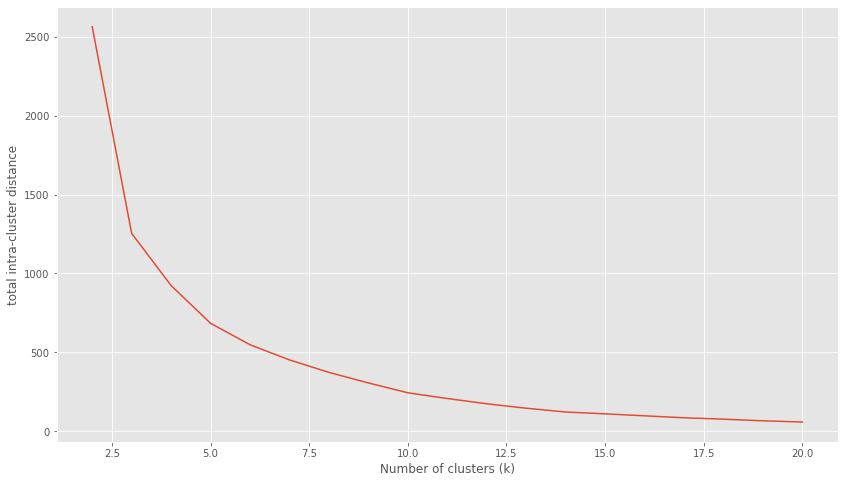

In [7]:
#k-means cluster analysis
#Task 1.4.2 Vary k (between 2 and 20) and check if there could be a better value for k. If yes, what is that value? 
#Also, describe how did you find that value?
# clustering for k = 2 to k = 20
ks = range(2,21)
scores = []
for k in ks:
    model = KMeans(n_clusters=k)
    y_pred = model.fit_predict(df_scaled)
    scores.append(-model.score(df_scaled))

fig = plt.figure(figsize=(14, 8))
plt.plot(ks, scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('total intra-cluster distance')
plt.show()
#nterpretation for best K: We can see that the total intra-cluster distance is large for 𝑘=1 and decreases as we 
#increase 𝑘 , until 𝑘=6, after which it tapers of and gets only marginally smaller. This indicates that 𝑘=6 is a good choice.

In [15]:
# Using k-means, cluster the fish into 6 clusters. Use the scaled dataset. Which species belong to which clusters?
# Cluster the states into two clusters using k-means
cluster_labels  = KMeans(n_clusters=5).fit_predict(df_scaled)
cluster_labels


# Print the states belonging to each cluster
print("Fish species in Cluster 0:")
print(df_transposed.index[cluster_labels == 0])
print("\Fish species in Cluster 1:")
print(df_transposed.index[cluster_labels == 1])
print("\Fish species in Cluster 2:")
print(df_transposed.index[cluster_labels == 2])
print("\Fish species in Cluster 3:")
print(df_transposed.index[cluster_labels == 3])
print("\Fish species in Cluster 4:")
print(df_transposed.index[cluster_labels == 4])

# Assign the cluster labels back to the DataFrame
#df['Cluster'] = cluster_labels

# Print the fish species belonging to each cluster
#for i in range(5):
#    print(f"Fish species in Cluster {i}:")
#    print(df[df['Cluster'] == i].index)


Fish species in Cluster 0:
Index(['CRUSTACEA', 'INVERTEBRATA AQUATICA', 'MAMMALIA', 'MOLLUSCA', 'PISCES',
       'Albacore', 'Alewife', 'Amer. plaice(=Long rough dab)',
       'American angler', 'American eel', 'American gizzard shad',
       'American lobster', 'American shad', 'American yellow perch',
       'Atlantic Spanish mackerel', 'Atlantic bay scallop',
       'Atlantic bluefin tuna', 'Atlantic cod', 'Atlantic croaker',
       'Atlantic halibut', 'Atlantic mackerel', 'Atlantic rock crab',
       'Atlantic searobins', 'Black drum', 'Black seabass', 'Black stone crab',
       'Blue mussel', 'Blue runner', 'Bluefish', 'Buffalofishes nei',
       'Californian anchovy', 'Caribbean spiny lobster', 'Catfishes nei',
       'Chinook(=Spring=King) salmon', 'Clams, etc. nei',
       'Coho(=Silver) salmon', 'Common carp', 'Dungeness crab',
       'Euro-American crayfishes nei', 'Flatfishes nei',
       'Freshwater fishes nei', 'Great Northern tilefish',
       'Grunts, sweetlips nei', 'Ki

In [25]:
#Visualize the data using PCA
#Calculate the principal components of the dataset.
#Store the principal components in a pandas dataframe. (Note - Index of this dataframe should be the names of the state)
pca_model = PCA()
X_PCA = pca_model.fit_transform(df_scaled)
# create a dataframe of the principal components
#pcs_df = pd.DataFrame(X_PCA, index=df.index)
X_PCA
pcs_df = pd.DataFrame(X_PCA, index=df_transposed.index)

[8.61287063e-01 7.00366681e-02 3.56847545e-02 1.06270662e-02
 4.14520102e-03 3.76627106e-03 3.65115342e-03 2.54710745e-03
 1.92942956e-03 1.03093710e-03 9.73868045e-04 8.48083711e-04
 7.40551773e-04 5.79085044e-04 3.64261673e-04 2.54907055e-04
 2.41821068e-04 2.29383817e-04 1.81196207e-04 1.35529072e-04
 1.29723652e-04 9.28118208e-05 8.22036124e-05 7.24346849e-05
 6.15072842e-05 4.91528470e-05 4.01097193e-05 3.09088836e-05
 2.65856420e-05 2.58263109e-05 1.89387058e-05 1.59693179e-05
 1.39086956e-05 1.16982020e-05 1.05950137e-05 8.95085988e-06
 7.74523684e-06 6.40283223e-06 5.57739610e-06 5.08709834e-06
 4.28833455e-06 3.91208879e-06 3.14585111e-06 2.65574031e-06
 2.33659402e-06 1.96693805e-06 1.91608137e-06 1.83576889e-06
 1.25016433e-06 1.06133458e-06 9.88026873e-07 8.77610062e-07
 6.91774629e-07 5.78005816e-07 4.52872733e-07 4.35621625e-07
 3.02542994e-07 2.47724417e-07 2.27310996e-07 1.75172346e-07
 9.13850927e-08 8.60199194e-08]


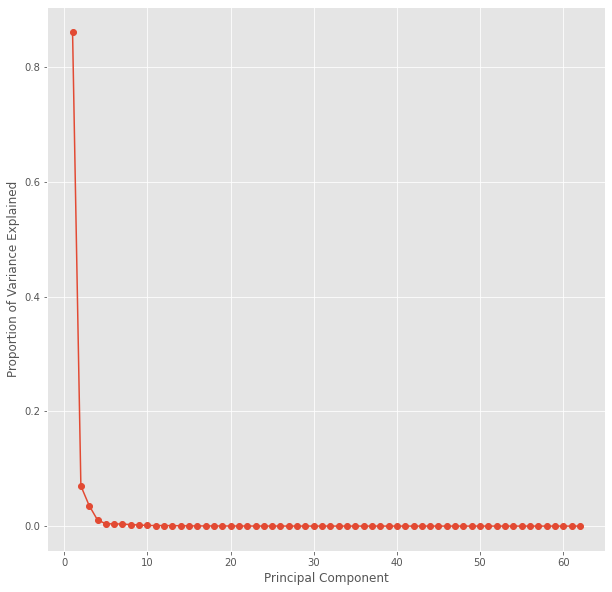

In [20]:
#Print the explained variance ratio of the PCA. Plot the explained variance ratio of the PCA. 
print(pca_model.explained_variance_ratio_)
plt.plot(range(1, 63), pca_model.explained_variance_ratio_, "-o")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.show()

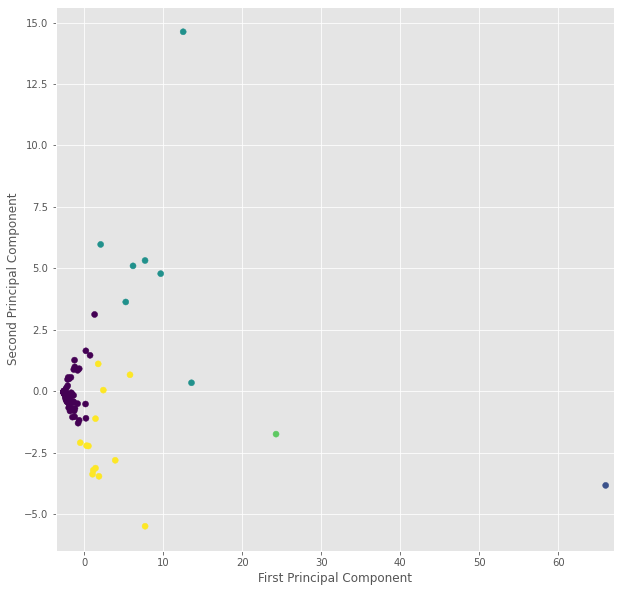

In [28]:
#Plot a scatterplot of PC1 and PC2. Using the matplotlib function annotate, use the state names as markers (instead of dots). From this scatterplot, can you tell approximately how many clusters our dataset shall have?
fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,0].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,1].min()-1,X_PCA[:,1].max()+1)

plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=cluster_labels,  marker="o"); 

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.show()
    

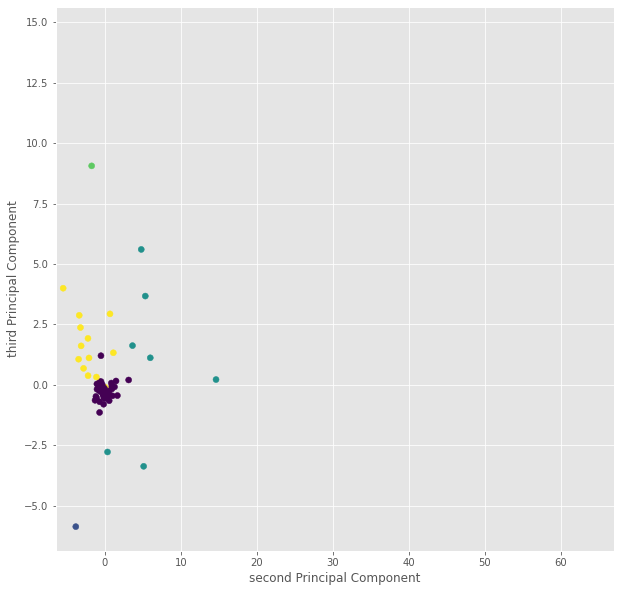

In [29]:
#Plot a scatterplot of PC2 and PC3. Using the matplotlib function annotate, use the state names as markers (instead of dots). From this scatterplot, can you tell approximately how many clusters our dataset shall have?
fig,ax1 = plt.subplots()

ax1.set_xlim(X_PCA[:,1].min()-1,X_PCA[:,0].max()+1)
ax1.set_ylim(X_PCA[:,2].min()-1,X_PCA[:,1].max()+1)

plt.scatter(X_PCA[:, 1], X_PCA[:, 2], c=cluster_labels,  marker="o"); 

ax1.set_xlabel('second Principal Component')
ax1.set_ylabel('third Principal Component')
plt.show()
    

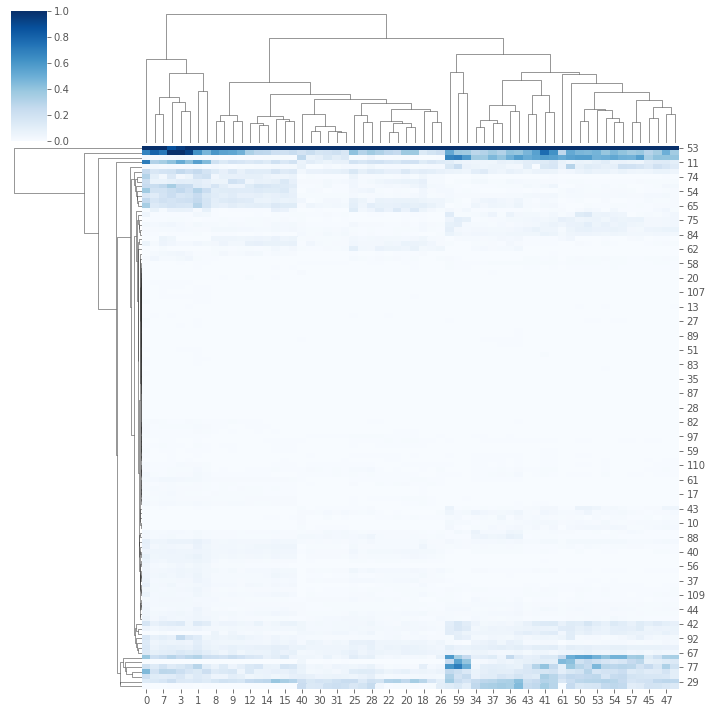

In [30]:
# Generate the clustermap
sns.clustermap(df_scaled,method="average", metric="euclidean", cmap='Blues', standard_scale=1)

In [32]:
# There are 5 clusters
agg_cluster_model = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=5)
y_pred5 = agg_cluster_model.fit_predict(df_scaled)

# Print the states belonging to each cluster
print("Fish species in Cluster 0:")
print(df_transposed.index[y_pred5 == 0])
print("\Fish species in Cluster 1:")
print(df_transposed.index[y_pred5 == 1])
print("\Fish species in Cluster 2:")
print(df_transposed.index[y_pred5 == 2])
print("\Fish species in Cluster 3:")
print(df_transposed.index[y_pred5 == 3])
print("\Fish species in Cluster 4:")
print(df_transposed.index[y_pred5 == 4])

Fish species in Cluster 0:
Index(['American cupped oyster', 'American sea scallop', 'Atlantic herring',
       'Atlantic surf clam', 'Ocean quahog', 'Pink(=Humpback) salmon',
       'Sockeye(=Red) salmon'],
      dtype='object')
\Fish species in Cluster 1:
Index(['AMPHIBIA, REPTILIA', 'CRUSTACEA', 'INVERTEBRATA AQUATICA', 'MAMMALIA',
       'MOLLUSCA', 'PISCES', 'PLANTAE AQUATICAE', 'Albacore', 'Alewife',
       'Amer. plaice(=Long rough dab)',
       ...
       'Various squids nei', 'Whelks', 'White hake', 'White perch',
       'White weakfish', 'Whitefishes nei', 'Winter flounder',
       'Witch flounder', 'Yellowfin tuna', 'Yellowtail flounder'],
      dtype='object', length=103)
\Fish species in Cluster 2:
Index(['Atlantic menhaden'], dtype='object')
\Fish species in Cluster 3:
Index(['Gulf menhaden'], dtype='object')
\Fish species in Cluster 4:
Index(['Pacific cod'], dtype='object')


In [37]:
print(df_transposed.index[y_pred5 == 1])

Index(['AMPHIBIA, REPTILIA', 'CRUSTACEA', 'INVERTEBRATA AQUATICA', 'MAMMALIA',
       'MOLLUSCA', 'PISCES', 'PLANTAE AQUATICAE', 'Albacore', 'Alewife',
       'Amer. plaice(=Long rough dab)',
       ...
       'Various squids nei', 'Whelks', 'White hake', 'White perch',
       'White weakfish', 'Whitefishes nei', 'Winter flounder',
       'Witch flounder', 'Yellowfin tuna', 'Yellowtail flounder'],
      dtype='object', length=103)


In [38]:
print(', '.join(df_transposed.index[y_pred5 == 1]))

AMPHIBIA, REPTILIA, CRUSTACEA, INVERTEBRATA AQUATICA, MAMMALIA, MOLLUSCA, PISCES, PLANTAE AQUATICAE, Albacore, Alewife, Amer. plaice(=Long rough dab), American angler, American eel, American gizzard shad, American lobster, American shad, American yellow perch, Atlantic Spanish mackerel, Atlantic bay scallop, Atlantic bluefin tuna, Atlantic cod, Atlantic croaker, Atlantic halibut, Atlantic mackerel, Atlantic rock crab, Atlantic searobins, Black drum, Black seabass, Black stone crab, Blue crab, Blue mussel, Blue runner, Bluefish, Buffalofishes nei, Californian anchovy, Caribbean spiny lobster, Catfishes nei, Chinook(=Spring=King) salmon, Chum(=Keta=Dog) salmon, Clams, etc. nei, Coho(=Silver) salmon, Common carp, Dungeness crab, Euro-American crayfishes nei, Finfishes nei, Flatfishes nei, Freshwater fishes nei, Great Northern tilefish, Grunts, sweetlips nei, Haddock, King mackerel, Lake cisco, Lake trout(=Char), Lake(=Common) whitefish, Lingcod, Marine fishes nei, Mullets nei, Natantian d

In [89]:
#choose 'Atlantic menhaden', 'Gulf menhaden','Pacific cod', 'Atlantic herring'or'American cupped oyster'as representative for each cluster
#merge this column to predictors
df_final = pd.read_csv('merged_depth1_calco_CPI_PPI_Major_species_Cleaned_04182023.csv')
#select only predictors 'T_degC', 'Salnty', 'O2Sat', 'Oxy_µmol/Kg', 'PO4uM', 'SiO3uM', 'CPI', and only 5 fish species 
df_final_used_features = df_final[['Year','T_degC', 'Salnty', 'O2Sat', 'Oxy_µmol/Kg', 'PO4uM', 'SiO3uM', 'CPI','Atlantic menhaden', 'Gulf menhaden','Pacific cod', 'Atlantic herring', 'Atlantic cod']] 

In [90]:
df_final_used_features['Year'] = df_final_used_features['Year'].fillna(0).astype(int)
df_final_used_features = df_final_used_features.set_index('Year')
df_final_used_features

<ipython-input-90-17f6832a0d19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_used_features['Year'] = df_final_used_features['Year'].fillna(0).astype(int)


,T_degC,Salnty,O2Sat,Oxy_µmol/Kg,PO4uM,SiO3uM,CPI,Atlantic menhaden,Gulf menhaden,Pacific cod,Atlantic herring,Atlantic cod
Year,,,,,,,,,,,,
1950,19.540000,33.170000,94.100000,216.212200,NaN,NaN,19.366667,134041.5,197452.0,3215.0,89147.0,26077.0
1951,14.220000,NaN,NaN,NaN,NaN,NaN,22.125000,141680.0,227874.0,4340.0,30487.0,22690.0
1952,19.330000,33.490000,NaN,NaN,NaN,NaN,21.541667,152126.0,323341.0,4919.0,70383.0,19816.0
1954,18.525000,33.535000,104.250000,245.060850,NaN,NaN,20.841667,267364.0,253518.0,7553.0,59056.0,16703.0
1955,17.746608,33.760167,101.744078,234.134475,0.488889,NaN,20.400000,275715.5,295790.0,5883.0,47938.0,16140.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2015,19.617633,33.416097,105.372000,242.231617,0.295333,2.495667,286.308083,200163.0,539471.0,317544.0,79532.0,1526.0
2016,17.403500,33.418827,107.088315,259.232234,0.310842,2.295446,284.232917,168790.0,618845.0,321468.0,62608.0,1461.0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
#drop NA
df_for_model = df_final_used_features.dropna()
df_for_model

,T_degC,Salnty,O2Sat,Oxy_µmol/Kg,PO4uM,SiO3uM,CPI,Atlantic menhaden,Gulf menhaden,Pacific cod,Atlantic herring,Atlantic cod
Year,,,,,,,,,,,,
1959,17.863894,33.669580,98.838904,234.127940,0.353824,1.666667,22.500000,273738.5,451676.0,6045.0,55056.0,21084.0
1961,16.649860,33.485743,99.035517,240.502596,0.462041,2.437500,22.991667,258943.5,532044.0,1391.0,26419.0,21133.0
1962,16.226779,33.640093,98.763186,241.461856,0.458537,3.152174,23.975000,279246.5,506527.0,1445.0,71912.0,21278.0
1963,19.458958,33.878460,105.130020,241.246157,0.533880,3.920548,23.933333,164860.5,493919.0,2889.0,70203.0,19132.0
1964,15.373122,33.562444,103.366458,255.314703,0.438119,2.900926,23.366667,127737.5,456656.0,2909.0,28887.0,17576.0
1965,16.163011,33.578053,103.928220,254.272546,0.412083,2.625000,24.058333,137935.5,507077.0,4606.0,34360.0,16351.0
1968,15.268290,33.492504,107.116521,266.882645,0.372807,2.890374,26.941667,100141.0,423459.0,2892.0,41838.0,22324.0
1969,16.555962,33.526527,105.148660,255.190341,0.367948,2.316281,28.400000,75084.0,550880.0,1975.0,31371.0,26083.0
1971,12.290000,32.878000,105.050000,279.102000,0.445000,3.500000,34.491667,133100.0,729900.0,2800.0,35100.0,24600.0


In [93]:
#save to csv
df_for_model
 #Save DataFrame to a CSV file
df_for_model.to_csv('df_for_model.csv', index=True)

In [94]:
len(df_for_model)
#we have 48 years of data

48

In [95]:
df_for_model.describe() 

,T_degC,Salnty,O2Sat,Oxy_µmol/Kg,PO4uM,SiO3uM,CPI,Atlantic menhaden,Gulf menhaden,Pacific cod,Atlantic herring,Atlantic cod
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,16.425669,33.460715,104.559200,254.478397,0.391128,3.193948,145.783866,197715.114583,567325.958333,168442.250000,62995.958333,19758.125000
std,1.406409,0.313078,2.430259,9.692939,0.124968,1.866246,83.882708,53091.607602,150415.453392,120079.282232,24757.569910,13178.096243
min,12.290000,32.878000,98.763186,219.612700,0.252069,1.310345,22.500000,75084.000000,369924.000000,1391.000000,23253.000000,1461.000000
25%,15.823230,33.326525,103.671581,251.208161,0.340657,2.433205,71.385417,169902.250000,456503.250000,5775.250000,40777.250000,8882.000000
50%,16.269569,33.444256,104.442250,254.318852,0.375100,2.961523,154.150000,189050.000000,524108.000000,221969.500000,62097.500000,17554.500000
75%,16.819708,33.513644,105.384668,258.770317,0.405753,3.359752,195.770833,214873.750000,619666.000000,255554.000000,80594.500000,27038.500000
max,21.833750,35.304000,110.600000,279.102000,1.140000,15.000000,289.006833,363289.000000,982888.000000,325815.000000,120833.000000,51018.000000


In [96]:
import seaborn as sns

# Compute the correlation matrix
corr_matrix =df_for_model .corr()

# Print the correlation matrix
print(corr_matrix)

                     T_degC    Salnty     O2Sat  Oxy_µmol/Kg     PO4uM  \
T_degC             1.000000  0.657169  0.173405    -0.808640  0.372775   
Salnty             0.657169  1.000000  0.177272    -0.679723  0.820165   
O2Sat              0.173405  0.177272  1.000000     0.367983  0.143852   
Oxy_µmol/Kg       -0.808640 -0.679723  0.367983     1.000000 -0.490494   
PO4uM              0.372775  0.820165  0.143852    -0.490494  1.000000   
SiO3uM             0.404716  0.816956  0.294060    -0.436452  0.933749   
CPI               -0.086131 -0.300690  0.231070     0.280550 -0.307949   
Atlantic menhaden  0.122236  0.009490 -0.255428    -0.229573 -0.123381   
Gulf menhaden     -0.085203 -0.164072 -0.150899     0.009588 -0.041708   
Pacific cod       -0.069898 -0.328812  0.169787     0.237544 -0.334952   
Atlantic herring  -0.109547 -0.239973  0.187744     0.271575 -0.295698   
Atlantic cod       0.042271  0.073584 -0.138164    -0.140486  0.092146   

                     SiO3uM       CPI

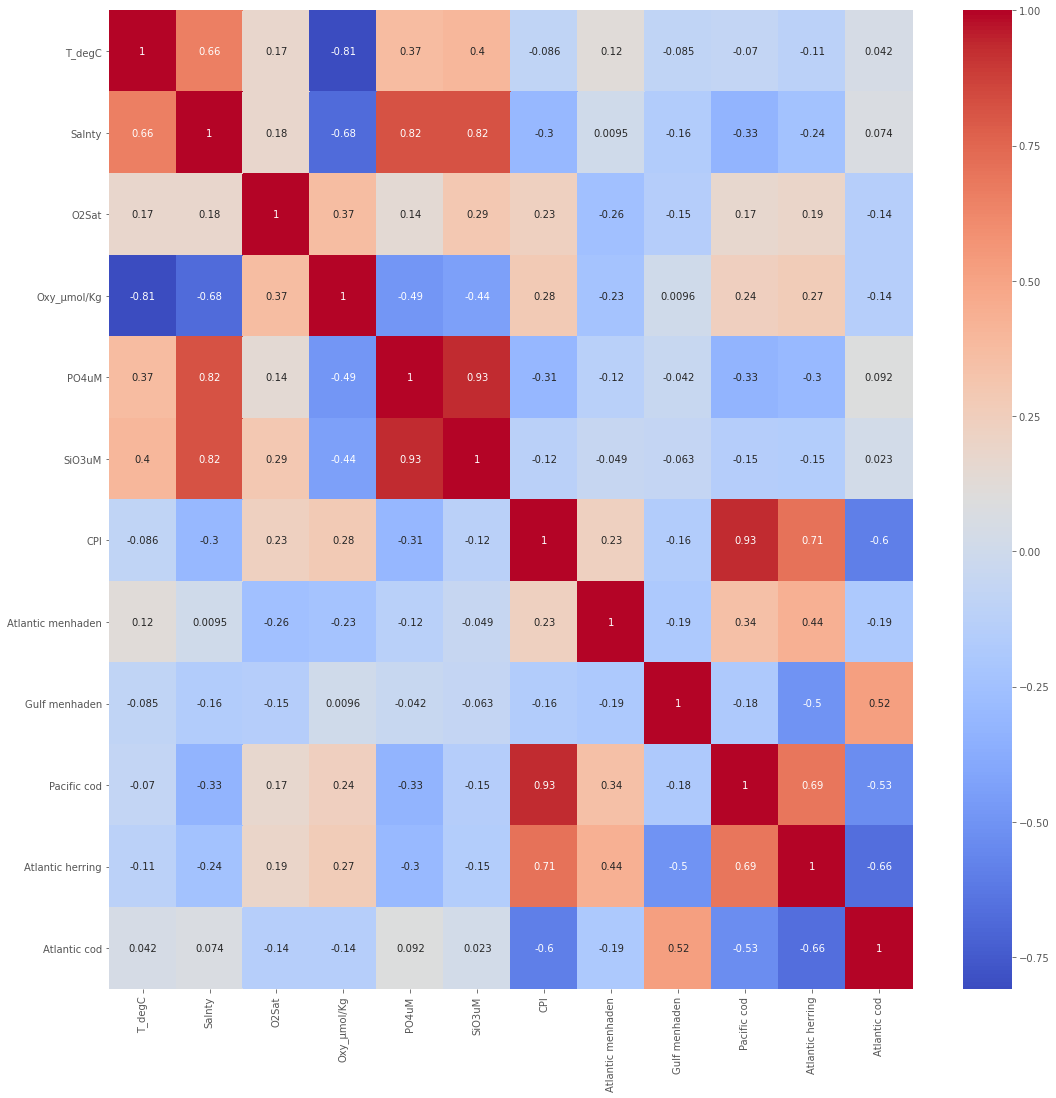

In [97]:
# Plot the heatmap
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

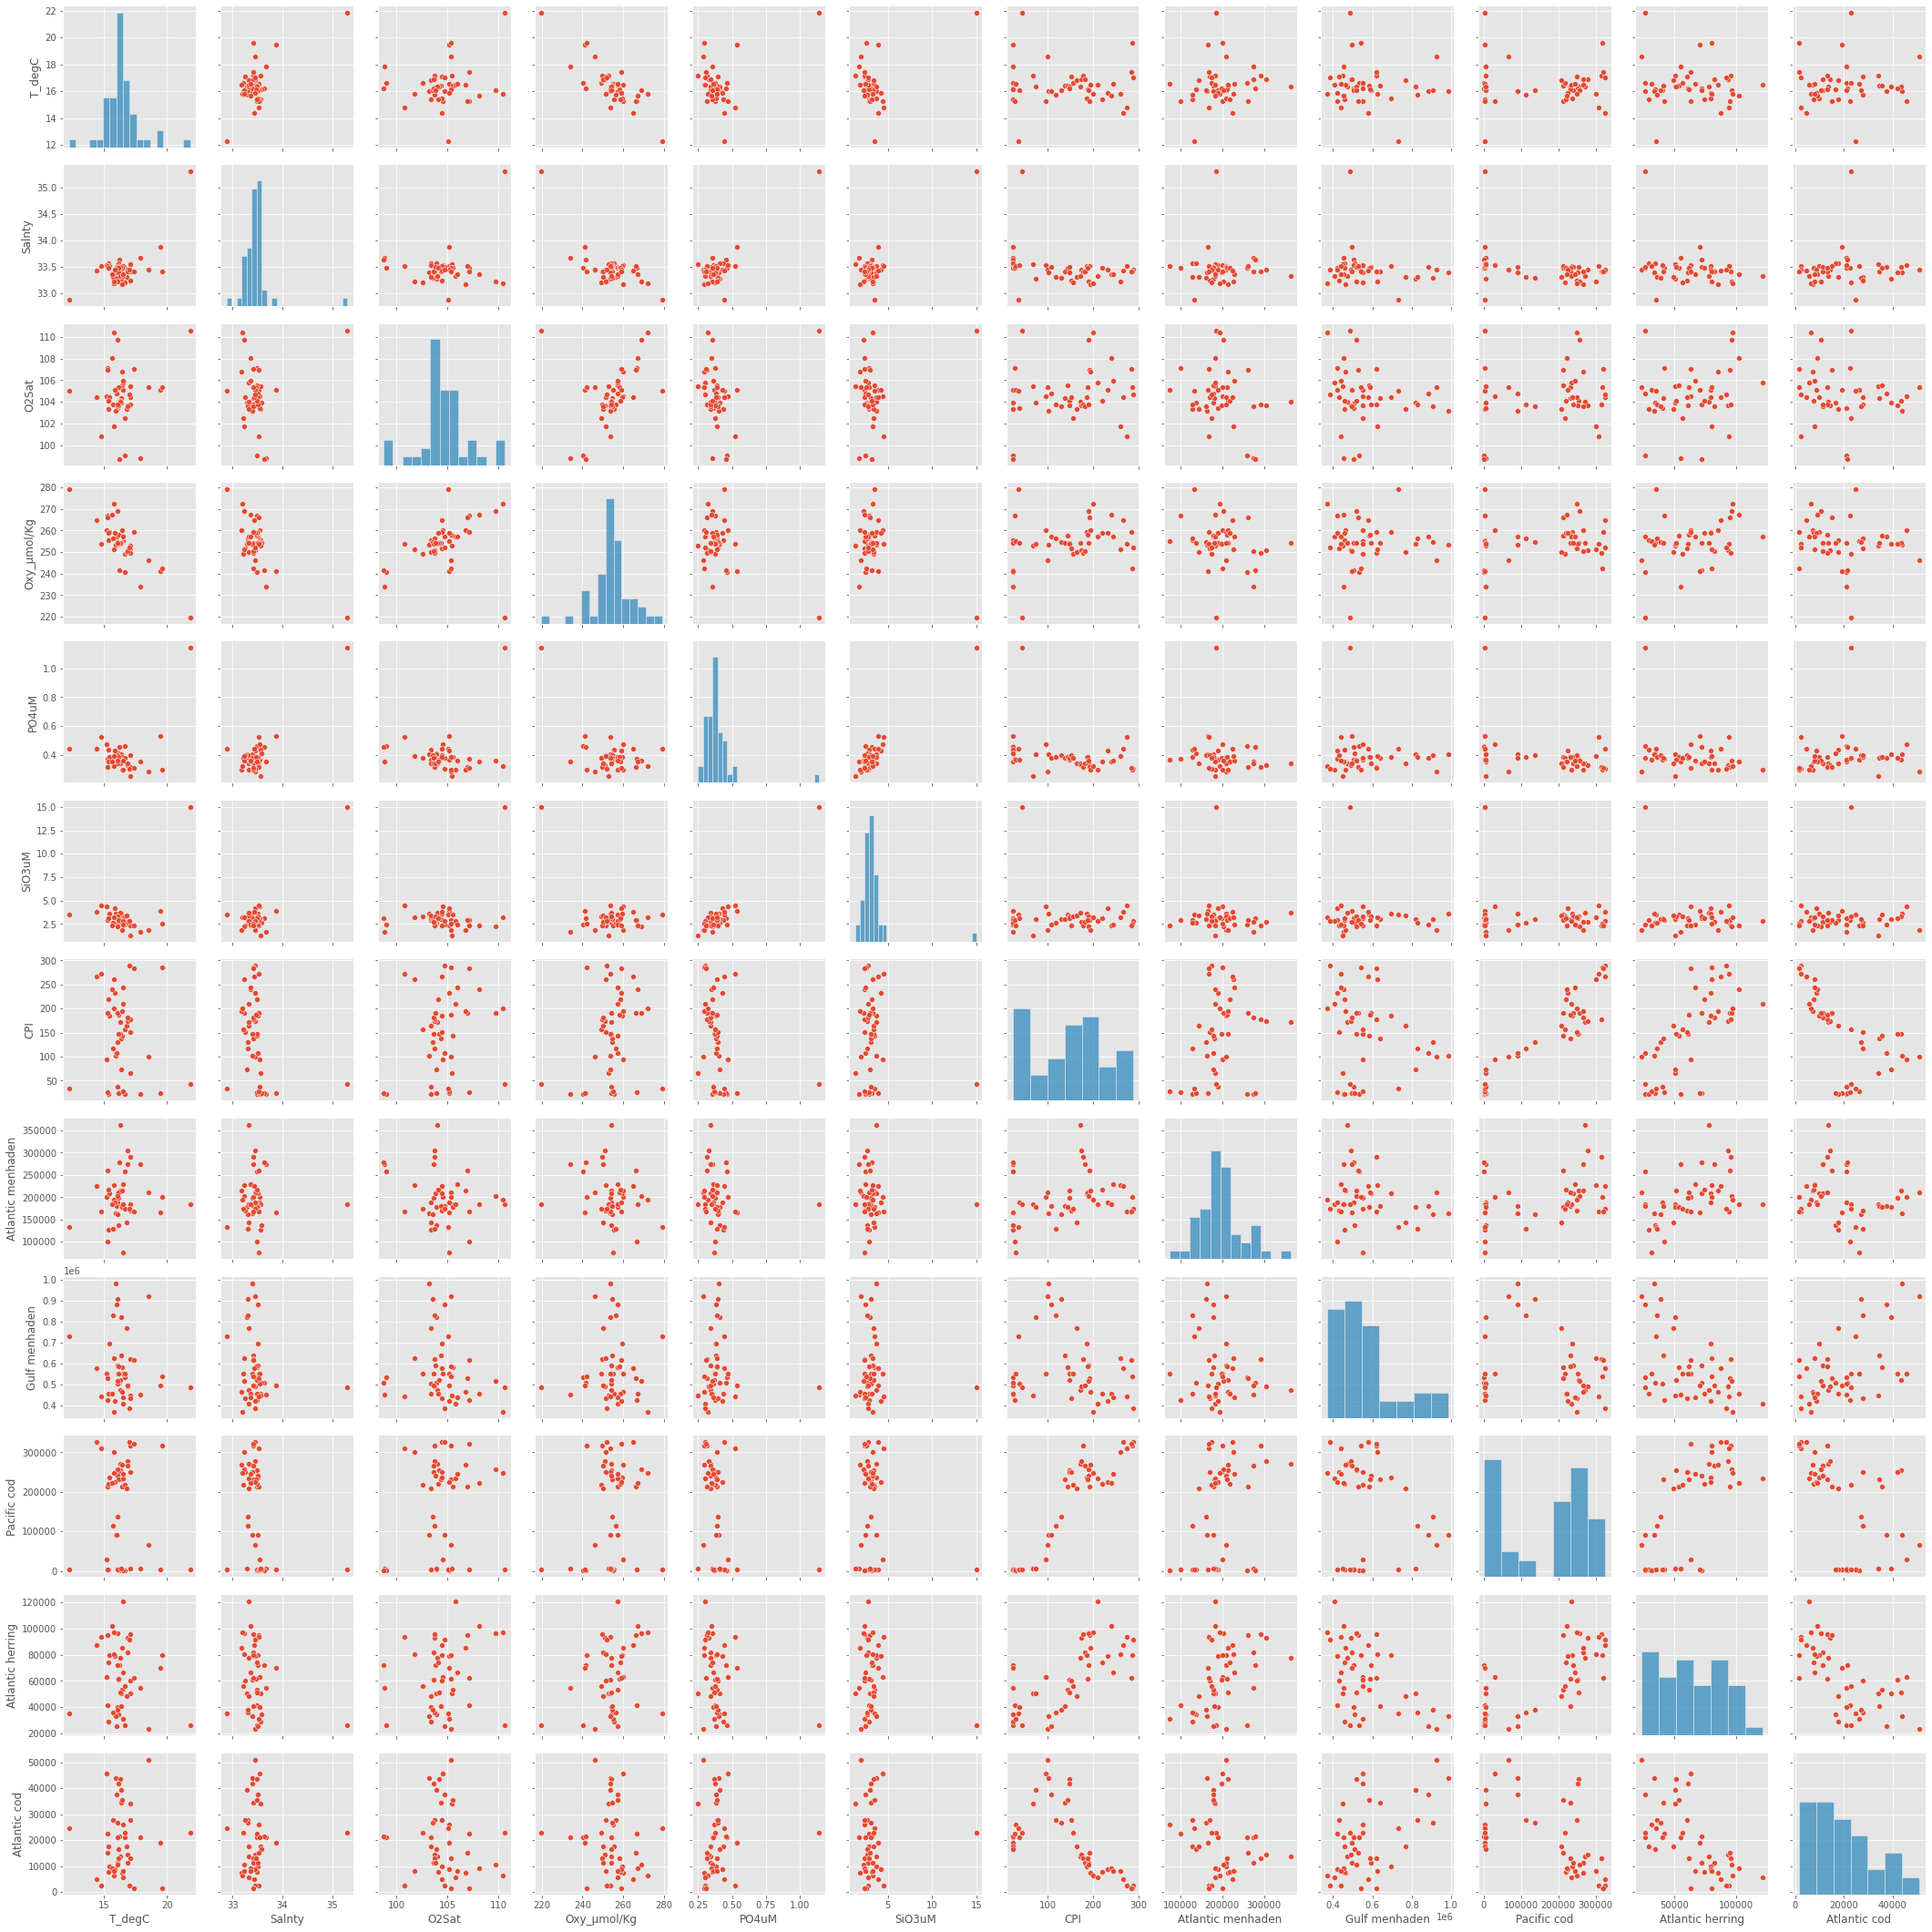

In [98]:
import seaborn as sns

# create scatter plots for all columns
sns.pairplot(df_for_model)


In [99]:
# change column name so no space there
df_for_model = df_for_model.rename(columns={
    "Atlantic menhaden": "Atlantic_menhaden",
    "Gulf menhaden": "Gulf_menhaden",
    "Pacific cod": "Pacific_cod",
    "Atlantic herring": "Atlantic_herring",
    "Atlantic cod": "Atlantic_cod",
    "Oxy_µmol/Kg": "Oxy_umol_per_Kg"
})
df_for_model

,T_degC,Salnty,O2Sat,Oxy_umol_per_Kg,PO4uM,SiO3uM,CPI,Atlantic_menhaden,Gulf_menhaden,Pacific_cod,Atlantic_herring,Atlantic_cod
Year,,,,,,,,,,,,
1959,17.863894,33.669580,98.838904,234.127940,0.353824,1.666667,22.500000,273738.5,451676.0,6045.0,55056.0,21084.0
1961,16.649860,33.485743,99.035517,240.502596,0.462041,2.437500,22.991667,258943.5,532044.0,1391.0,26419.0,21133.0
1962,16.226779,33.640093,98.763186,241.461856,0.458537,3.152174,23.975000,279246.5,506527.0,1445.0,71912.0,21278.0
1963,19.458958,33.878460,105.130020,241.246157,0.533880,3.920548,23.933333,164860.5,493919.0,2889.0,70203.0,19132.0
1964,15.373122,33.562444,103.366458,255.314703,0.438119,2.900926,23.366667,127737.5,456656.0,2909.0,28887.0,17576.0
1965,16.163011,33.578053,103.928220,254.272546,0.412083,2.625000,24.058333,137935.5,507077.0,4606.0,34360.0,16351.0
1968,15.268290,33.492504,107.116521,266.882645,0.372807,2.890374,26.941667,100141.0,423459.0,2892.0,41838.0,22324.0
1969,16.555962,33.526527,105.148660,255.190341,0.367948,2.316281,28.400000,75084.0,550880.0,1975.0,31371.0,26083.0
1971,12.290000,32.878000,105.050000,279.102000,0.445000,3.500000,34.491667,133100.0,729900.0,2800.0,35100.0,24600.0


Based on the correlation matrix provided, here's a description of the relationship between different features and fish species:

Atlantic menhaden:

Positively correlated with CPI
Negatively correlated with O2Sat, Oxy_µmol/Kg

Gulf menhaden:

Negatively correlated with Salnty, O2Sat, CPI

Pacific cod:

Positively correlated with T_degC, O2Sat, Oxy_µmol/Kg, CPI
Negatively correlated with Salnty, PO4uM, SiO3uM

Atlantic herring:

Positively correlated with O2Sat, Oxy_µmol/Kg, CPI
Negatively correlated with Salnty, PO4uM, SiO3uM

Atlantic cod:

Positively correlated with Salnty, PO4uM, SiO3uM
Negatively correlated with O2Sat, Oxy_µmol/Kg, CPI

It's important to note that correlation does not necessarily imply causation. The relationships observed are only associations between the variables and fish species. Other factors not included in this dataset may also influence these relationships.

In [100]:
#creat multilear model for each fish specie which represent 5 different clusters
#Multilinear Regression
import pandas as pd
import scipy as sc
import numpy as np

import statsmodels.formula.api as sm

#choose all predictors 
Atlantic_menhaden_model_ols = sm.ols(formula="Atlantic_menhaden ~ T_degC+Salnty+O2Sat+Oxy_umol_per_Kg+PO4uM+SiO3uM+CPI", data=df_for_model).fit()
Atlantic_menhaden_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Atlantic_menhaden   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     1.982
Date:                Wed, 19 Apr 2023   Prob (F-statistic):             0.0818
Time:                        23:48:17   Log-Likelihood:                -582.69
No. Observations:                  48   AIC:                             1181.
Df Residuals:                      40   BIC:                             1196.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6.271e+05   2.47e+06      0.254      0.801   -4.36e+06    5.62e+06
T_degC          -1.553e+04   3.85e+04     -0.403      0.689   -9.33e+04    6.23e+04
Salnty           2.832e+04   6.27e+04      0.452      0.654   -9.84e+04    1.55e+05
O2Sat            -842.8201   1.71e+04     -0.049      0.961   -3.53e+04    3.36e+04
Oxy_umol_per_Kg -3812.6134   7329.219     -0.520      0.606   -1.86e+04     1.1e+04
PO4uM           -3.291e+05   2.05e+05     -1.605      0.116   -7.43e+05    8.52e+04
SiO3uM           1.262e+04   1.61e+04      0.785      0.437   -1.99e+04    4.51e+04
CPI               169.7758    110.839      1.532      0.133     -54.238     393.789
==============================================================================
Omnibus:                        3.496   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                2.402
Skew:                           0.456   Prob(JB):                        0.301
Kurtosis:                       3.607   Cond. No.                     1.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
#Based on correlation, I will choose the variances that are more related to fish
#Atlantic menhaden:Positively correlated with CPI,Negatively correlated with O2Sat, Oxy_µmol/Kg
Atlantic_menhaden2_model_ols = sm.ols(formula="Atlantic_menhaden ~ O2Sat+Oxy_umol_per_Kg+CPI", data=df_for_model).fit()
Atlantic_menhaden2_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Atlantic_menhaden   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     3.737
Date:                Thu, 20 Apr 2023   Prob (F-statistic):             0.0178
Time:                        00:03:24   Log-Likelihood:                -584.39
No. Observations:                  48   AIC:                             1177.
Df Residuals:                      44   BIC:                             1184.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.069e+06   3.28e+05      3.265      0.002    4.09e+05    1.73e+06
O2Sat           -5480.2735   3194.909     -1.715      0.093   -1.19e+04     958.642
Oxy_umol_per_Kg -1304.0771    811.973     -1.606      0.115   -2940.501     332.347
CPI               227.4612     89.669      2.537      0.015      46.744     408.178
==============================================================================
Omnibus:                        7.980   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.282
Skew:                           0.734   Prob(JB):                       0.0262
Kurtosis:                       4.219   Cond. No.                     1.46e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
#choose all features
Gulf_menhaden_model_ols = sm.ols(formula="Gulf_menhaden ~ T_degC+Salnty+O2Sat+Oxy_umol_per_Kg+PO4uM+SiO3uM+CPI", data=df_for_model).fit()
Gulf_menhaden_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Gulf_menhaden   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.9665
Date:                Wed, 19 Apr 2023   Prob (F-statistic):              0.468
Time:                        23:48:17   Log-Likelihood:                -636.07
No. Observations:                  48   AIC:                             1288.
Df Residuals:                      40   BIC:                             1303.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.137e+07   7.51e+06      1.514      0.138    -3.8e+06    2.65e+07
T_degC           5.751e+04   1.17e+05      0.491      0.626   -1.79e+05    2.94e+05
Salnty          -3.283e+05   1.91e+05     -1.722      0.093   -7.14e+05    5.71e+04
O2Sat           -2.413e+04   5.19e+04     -0.465      0.644   -1.29e+05    8.08e+04
Oxy_umol_per_Kg  6818.1401   2.23e+04      0.306      0.761   -3.82e+04    5.19e+04
PO4uM           -1.672e+05   6.23e+05     -0.268      0.790   -1.43e+06    1.09e+06
SiO3uM           5.445e+04   4.89e+04      1.114      0.272   -4.43e+04    1.53e+05
CPI              -570.2658    337.053     -1.692      0.098   -1251.476     110.944
==============================================================================
Omnibus:                        9.984   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.647
Skew:                           1.062   Prob(JB):                      0.00804
Kurtosis:                       3.560   Cond. No.                     1.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
#Gulf menhaden:Negatively correlated with Salnty, O2Sat, CPI
Gulf_menhaden2_model_ols = sm.ols(formula="Gulf_menhaden ~ Salnty+O2Sat+CPI", data=df_for_model).fit()
Gulf_menhaden2_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Gulf_menhaden   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.281
Date:                Thu, 20 Apr 2023   Prob (F-statistic):              0.293
Time:                        00:05:11   Log-Likelihood:                -637.81
No. Observations:                  48   AIC:                             1284.
Df Residuals:                      44   BIC:                             1291.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.526e+06   2.47e+06      1.833      0.074    -4.5e+05     9.5e+06
Salnty     -1.045e+05   7.55e+04     -1.383      0.174   -2.57e+05    4.77e+04
O2Sat      -3880.9290   9540.375     -0.407      0.686   -2.31e+04    1.53e+04
CPI         -385.1491    285.227     -1.350      0.184    -959.986     189.688
==============================================================================
Omnibus:                        9.489   Durbin-Watson:                   0.947
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.301
Skew:                           1.063   Prob(JB):                      0.00956
Kurtosis:                       3.364   Cond. No.                     2.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
##Pacific cod: Positively correlated with T_degC, O2Sat, Oxy_µmol/Kg, CPI, Negatively correlated with Salnty, PO4uM, SiO3uM

Pacific_cod_model_ols = sm.ols(formula="Pacific_cod ~ T_degC+Salnty+O2Sat+Oxy_umol_per_Kg+PO4uM+SiO3uM+CPI", data=df_for_model).fit()
Pacific_cod_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Pacific_cod   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     41.17
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           2.55e-16
Time:                        23:50:30   Log-Likelihood:                -578.49
No. Observations:                  48   AIC:                             1173.
Df Residuals:                      40   BIC:                             1188.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.138e+06   2.26e+06      1.387      0.173   -1.43e+06    7.71e+06
T_degC          -8755.7254   3.53e+04     -0.248      0.805   -8.01e+04    6.25e+04
Salnty          -7.685e+04   5.75e+04     -1.337      0.189   -1.93e+05    3.93e+04
O2Sat            4136.2911   1.56e+04      0.264      0.793   -2.75e+04    3.57e+04
Oxy_umol_per_Kg -3288.7185   6716.313     -0.490      0.627   -1.69e+04    1.03e+04
PO4uM           -1.999e+05   1.88e+05     -1.064      0.294    -5.8e+05     1.8e+05
SiO3uM           1.404e+04   1.47e+04      0.953      0.346   -1.57e+04    4.38e+04
CPI              1256.5979    101.570     12.372      0.000    1051.317    1461.878
==============================================================================
Omnibus:                        1.580   Durbin-Watson:                   0.486
Prob(Omnibus):                  0.454   Jarque-Bera (JB):                1.552
Skew:                           0.369   Prob(JB):                        0.460
Kurtosis:                       2.520   Cond. No.                     1.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
#use all features first
Atlantic_herring_model_ols = sm.ols(formula="Atlantic_herring ~ T_degC+Salnty+O2Sat+Oxy_umol_per_Kg+PO4uM+SiO3uM+CPI", data=df_for_model).fit()
Atlantic_herring_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Atlantic_herring   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     6.193
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           6.07e-05
Time:                        23:51:35   Log-Likelihood:                -535.59
No. Observations:                  48   AIC:                             1087.
Df Residuals:                      40   BIC:                             1102.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -9.064e+05   9.26e+05     -0.979      0.333   -2.78e+06    9.64e+05
T_degC           4639.9952   1.44e+04      0.321      0.750   -2.45e+04    3.38e+04
Salnty           2.394e+04   2.35e+04      1.018      0.315   -2.36e+04    7.14e+04
O2Sat           -2507.8396   6398.160     -0.392      0.697   -1.54e+04    1.04e+04
Oxy_umol_per_Kg  1326.9605   2747.838      0.483      0.632   -4226.628    6880.549
PO4uM           -3.642e+04   7.68e+04     -0.474      0.638   -1.92e+05    1.19e+05
SiO3uM            582.5323   6026.941      0.097      0.923   -1.16e+04    1.28e+04
CPI               200.4256     41.555      4.823      0.000     116.439     284.412
==============================================================================
Omnibus:                        1.518   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                1.150
Skew:                           0.379   Prob(JB):                        0.563
Kurtosis:                       2.971   Cond. No.                     1.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
#Atlantic herring:Positively correlated with O2Sat, Oxy_µmol/Kg, CPI,Negatively correlated with Salnty, PO4uM, SiO3uM
Atlantic_herring2_model_ols = sm.ols(formula="Atlantic_herring ~ O2Sat+Oxy_umol_per_Kg+Salnty+PO4uM+SiO3uM+CPI", data=df_for_model).fit()
Atlantic_herring2_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Atlantic_herring   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     7.369
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           2.18e-05
Time:                        00:14:19   Log-Likelihood:                -535.66
No. Observations:                  48   AIC:                             1085.
Df Residuals:                      41   BIC:                             1098.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7.414e+05   7.62e+05     -0.973      0.336   -2.28e+06    7.97e+05
O2Sat            -524.4055   1676.926     -0.313      0.756   -3911.026    2862.215
Oxy_umol_per_Kg   460.4239    528.731      0.871      0.389    -607.371    1528.218
Salnty           2.176e+04   2.23e+04      0.977      0.334   -2.32e+04    6.67e+04
PO4uM           -3.745e+04   7.59e+04     -0.493      0.625   -1.91e+05    1.16e+05
SiO3uM           -349.6047   5225.618     -0.067      0.947   -1.09e+04    1.02e+04
CPI               203.1449     40.238      5.049      0.000     121.883     284.407
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.170
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.456
Skew:                           0.426   Prob(JB):                        0.483
Kurtosis:                       2.962   Cond. No.                     9.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
#So the variables that I choose here are  7 variables, which are Deck,GaragCap,Patio,Taxes,TotSqf and Acres
Atlantic_cod_model_ols = sm.ols(formula="Atlantic_cod ~ T_degC+Salnty+O2Sat+Oxy_umol_per_Kg+PO4uM+SiO3uM+CPI", data=df_for_model).fit()
Atlantic_cod_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Atlantic_cod   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     3.907
Date:                Wed, 19 Apr 2023   Prob (F-statistic):            0.00248
Time:                        23:54:44   Log-Likelihood:                -510.44
No. Observations:                  48   AIC:                             1037.
Df Residuals:                      40   BIC:                             1052.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6.219e+05   5.48e+05      1.134      0.263   -4.86e+05    1.73e+06
T_degC            -57.7855   8546.107     -0.007      0.995   -1.73e+04    1.72e+04
Salnty          -1.644e+04   1.39e+04     -1.181      0.244   -4.46e+04    1.17e+04
O2Sat             423.8301   3788.617      0.112      0.911   -7233.251    8080.911
Oxy_umol_per_Kg  -281.5130   1627.110     -0.173      0.864   -3570.024    3006.998
PO4uM           -5.005e+04   4.55e+04     -1.100      0.278   -1.42e+05    4.19e+04
SiO3uM           4126.0424   3568.803      1.156      0.254   -3086.778    1.13e+04
CPI              -117.8645     24.607     -4.790      0.000    -167.596     -68.133
==============================================================================
Omnibus:                        7.635   Durbin-Watson:                   0.278
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.732
Skew:                           0.982   Prob(JB):                       0.0209
Kurtosis:                       2.903   Cond. No.                     1.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
#Atlantic cod:Positively correlated with Salnty, PO4uM, SiO3uM, Negatively correlated with O2Sat, Oxy_µmol/Kg, CPI
Atlantic_cod2_model_ols = sm.ols(formula="Atlantic_cod ~ +Salnty+O2Sat+Oxy_umol_per_Kg+PO4uM+SiO3uM+CPI", data=df_for_model).fit()
Atlantic_cod2_model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Atlantic_cod   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     4.672
Date:                Thu, 20 Apr 2023   Prob (F-statistic):            0.00105
Time:                        00:17:12   Log-Likelihood:                -510.44
No. Observations:                  48   AIC:                             1035.
Df Residuals:                      41   BIC:                             1048.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6.198e+05   4.51e+05      1.376      0.176    -2.9e+05    1.53e+06
Salnty          -1.642e+04   1.32e+04     -1.247      0.220    -4.3e+04    1.02e+04
O2Sat             399.1288    991.698      0.402      0.689   -1603.645    2401.903
Oxy_umol_per_Kg  -270.7214    312.680     -0.866      0.392    -902.192     360.749
PO4uM           -5.003e+04   4.49e+04     -1.114      0.272   -1.41e+05    4.07e+04
SiO3uM           4137.6510   3090.318      1.339      0.188   -2103.373    1.04e+04
CPI              -117.8983     23.796     -4.955      0.000    -165.955     -69.842
==============================================================================
Omnibus:                        7.628   Durbin-Watson:                   0.278
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.725
Skew:                           0.981   Prob(JB):                       0.0210
Kurtosis:                       2.902   Cond. No.                     9.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""